In [ ]:
!pip install apimoex

In [ ]:
import sys
import apimoex
import pandas as pd
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Последняя рабочая неделя, для сбора статистики
monday = datetime.datetime(year=2024, month=12, day=16)
tuesday = datetime.datetime(year=2024, month=12, day=17)
wednesday = datetime.datetime(year=2024, month=12, day=18)
thursday = datetime.datetime(year=2024, month=12, day=19)
friday = datetime.datetime(year=2024, month=12, day=20)
week = [monday, tuesday, wednesday, thursday, friday]

In [ ]:
# Рассматриваемые тикеры для статистик
tickers = ["SBER", "VTBR", "ROSN", "GOLD", "LKOH"]
extra_tickers = ["MOEXFN", "MOEXCN", "TRUR", ]

In [ ]:
seven = datetime.timedelta(days=7)
data = {}
friday = datetime.datetime.now()

with requests.Session() as session:
    for i in tickers:
        for weeks in range(36):
            dt = friday - weeks * seven
            candles = apimoex.get_market_candles(session, i, 10, str(dt - datetime.timedelta(days=5))[:-9], str(dt)[:-9])
            dc = pd.DataFrame(candles)
            if i not in data:
                data[i] = [dc]
            else:
                data[i].append(dc)


In [ ]:
# Объединение всех DataFrame для каждого тикера в один
for key in data:
    data[key] = pd.concat(data[key], ignore_index=True)
print(data)

{'SBER':                      begin    open   close    high     low        value  \
0      2025-01-06 14:20:00  271.93  271.32  272.20  270.87  201100916.3   
1      2025-01-06 14:30:00  271.30  271.53  271.75  271.12   49637367.0   
2      2025-01-06 14:40:00  271.51  271.67  272.00  271.51   63853258.9   
3      2025-01-06 14:50:00  271.67  271.71  271.78  271.15   51454131.7   
4      2025-01-06 15:00:00  271.64  271.60  271.95  271.49   29089575.1   
...                    ...     ...     ...     ...     ...          ...   
13443  2024-05-10 23:00:00  313.39  313.28  313.40  313.24   31989810.8   
13444  2024-05-10 23:10:00  313.28  313.24  313.35  313.22   15180852.5   
13445  2024-05-10 23:20:00  313.27  313.25  313.30  313.25   19539510.7   
13446  2024-05-10 23:30:00  313.25  313.29  313.30  313.25   20119277.8   
13447  2024-05-10 23:40:00  313.29  313.49  313.50  313.23   76369776.4   

       volume  
0      741260  
1      182820  
2      234940  
3      189530  
4      107

In [ ]:
instrument = "GOLD"
df = data[instrument]

In [ ]:
df.head(5)

,begin,open,close,high,low,value,volume
0,2025-01-06 14:20:00,2.1705,2.176,2.176,2.1695,1213473.52,558504
1,2025-01-06 14:30:00,2.1790,2.180,2.181,2.1725,144442.01,66295
2,2025-01-06 14:40:00,2.1800,2.184,2.185,2.1790,937360.52,429534
3,2025-01-06 14:50:00,2.1840,2.185,2.185,2.1820,615518.91,281807
4,2025-01-06 15:00:00,2.1850,2.183,2.185,2.1810,337260.72,154515


In [ ]:
# Проверка пропущенных значений
print(df.isnull().sum())

begin     0
open      0
close     0
high      0
low       0
value     0
volume    0
dtype: int64


In [ ]:
# Описание основных статистик
print(df.describe())


               open         close          high           low         value  \
count  13448.000000  13448.000000  13448.000000  13448.000000  1.344800e+04   
mean       1.913593      1.913595      1.915140      1.911426  8.542787e+05   
std        0.208395      0.208395      0.208722      0.208037  2.379140e+06   
min        1.566500      1.564000      1.578500      1.562500  1.892200e+02   
25%        1.713500      1.713500      1.715000      1.712000  1.203858e+05   
50%        1.833000      1.833500      1.835000      1.830750  3.336560e+05   
75%        2.132500      2.132500      2.134500      2.130000  8.387900e+05   
max        2.339500      2.340000      2.348500      2.331500  1.159136e+08   

             volume  
count  1.344800e+04  
mean   4.319012e+05  
std    1.210165e+06  
min    1.080000e+02  
25%    6.485750e+04  
50%    1.754340e+05  
75%    4.293945e+05  
max    6.396998e+07  


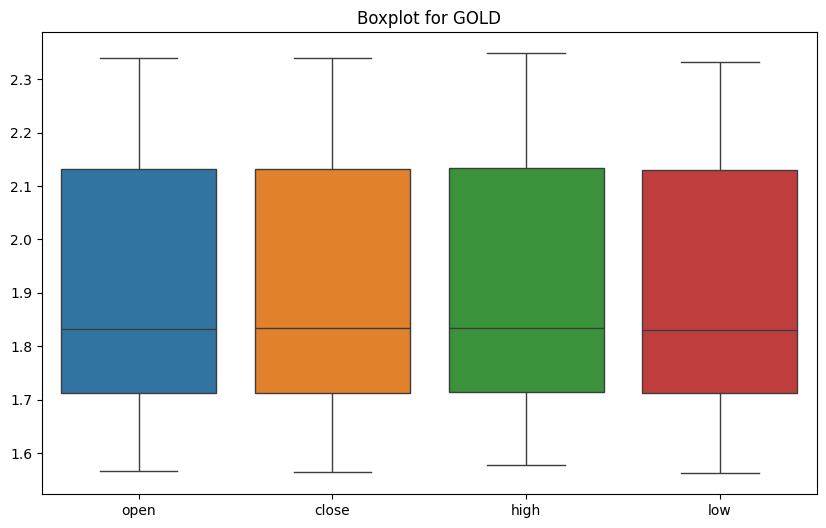

In [ ]:
# Анализ выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['open', 'close', 'high', 'low']])
plt.title(f'Boxplot for {instrument}')
plt.show()

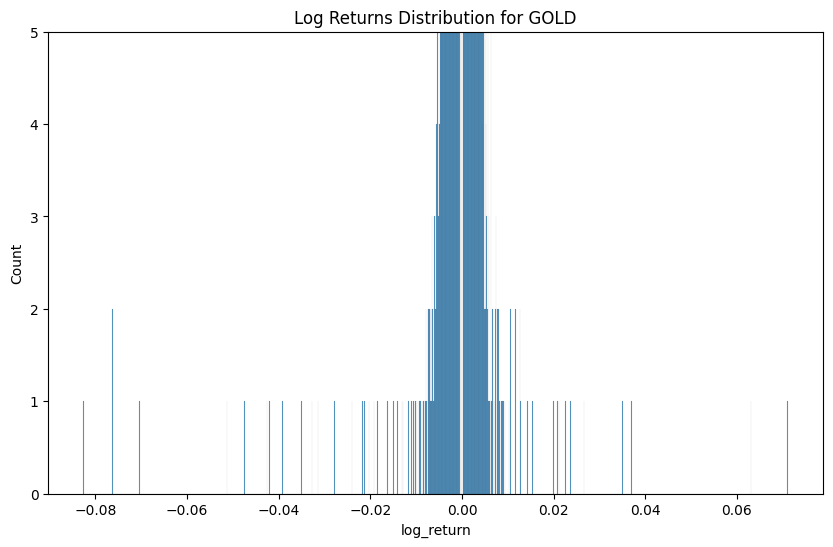

In [ ]:
# Распределение логарифмических доходностей
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
plt.figure(figsize=(10, 6))
sns.histplot(df['log_return'].dropna())
plt.title(f'Log Returns Distribution for {instrument}')
plt.ylim(0, 5)
plt.show()

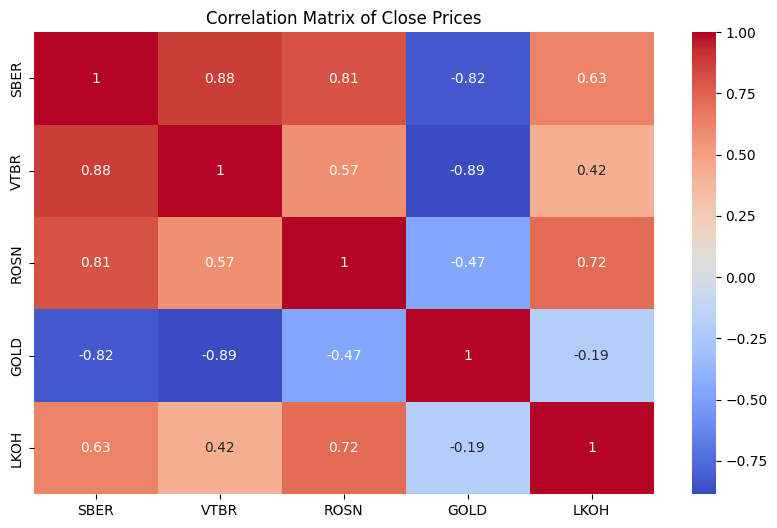

In [ ]:
# Построение матрицы корреляций по столбцу close
close_prices = pd.DataFrame({key: df['close'] for key, df in data.items()})
corr_matrix = close_prices.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Close Prices')
plt.show()


Instrument: SBER
Shapiro-Wilk Test: Statistics=0.29737405238130876, p-value=2.374948310069928e-114
Kolmogorov-Smirnov Test: Statistics=0.494582693738712, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13447.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-117.64902394262667, p-value=0.0


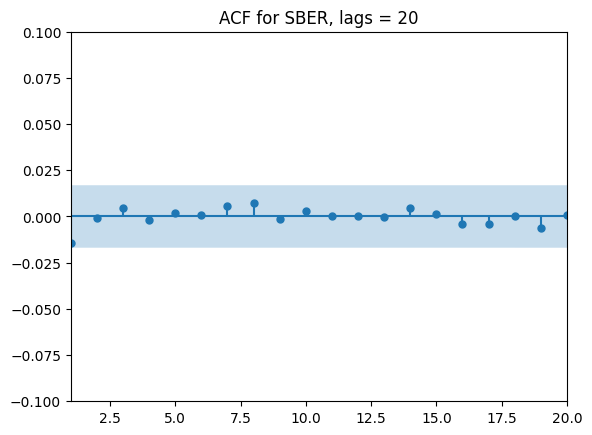

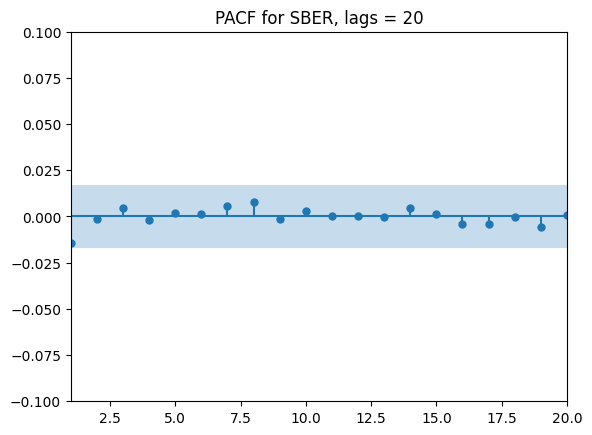

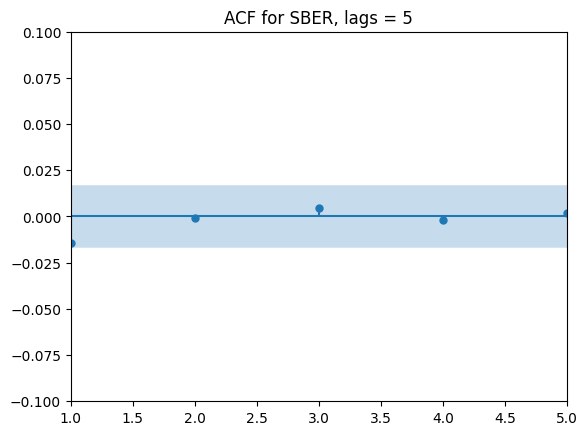

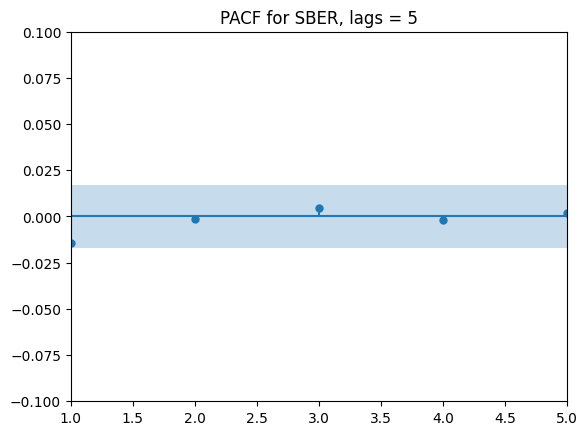


Instrument: VTBR
Shapiro-Wilk Test: Statistics=0.3907876403015257, p-value=6.838957107589237e-110
Kolmogorov-Smirnov Test: Statistics=0.49295532820315, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13115.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-118.35176779927458, p-value=0.0


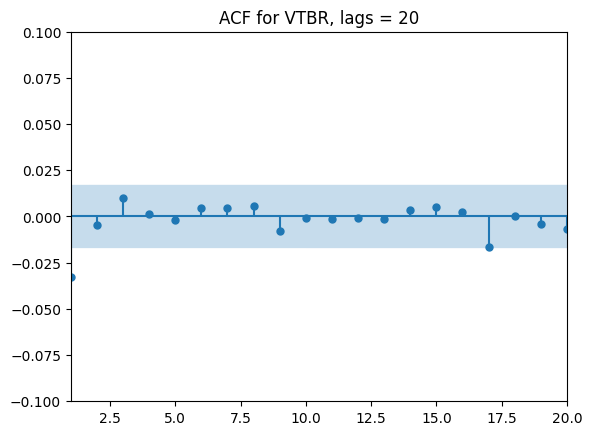

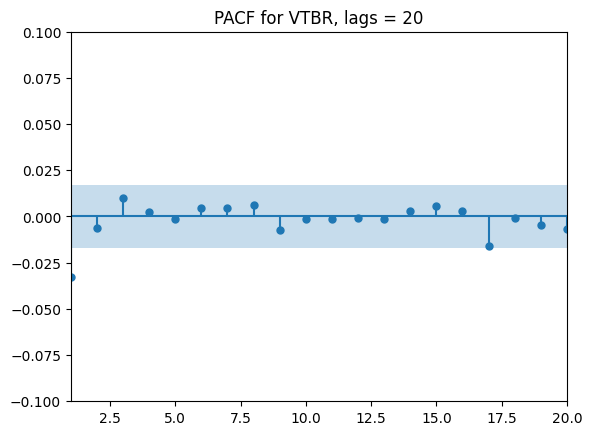

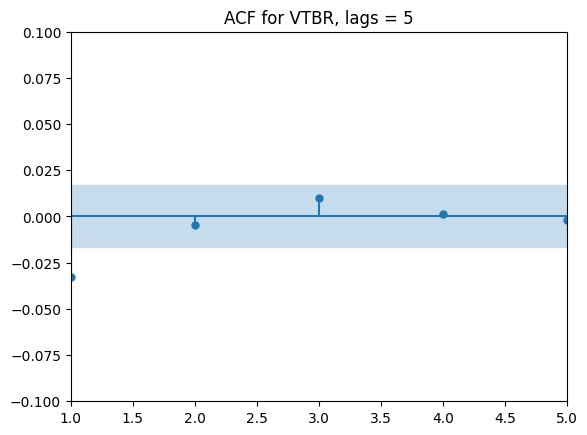

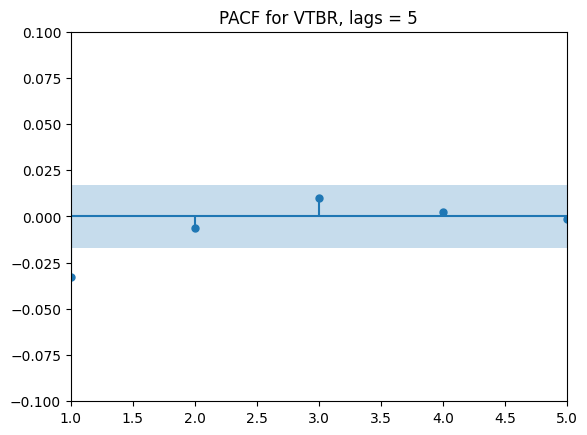


Instrument: ROSN
Shapiro-Wilk Test: Statistics=0.3404659478280977, p-value=1.136730418487527e-112
Kolmogorov-Smirnov Test: Statistics=0.4939163099020044, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13447.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-119.80276209120643, p-value=0.0


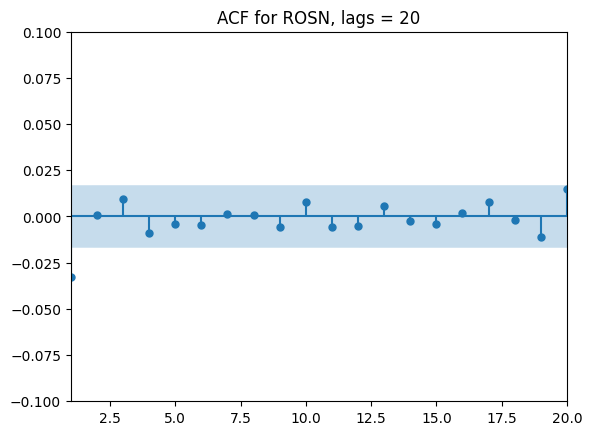

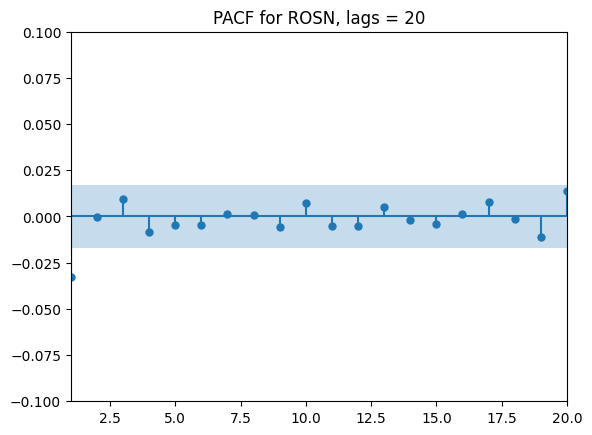

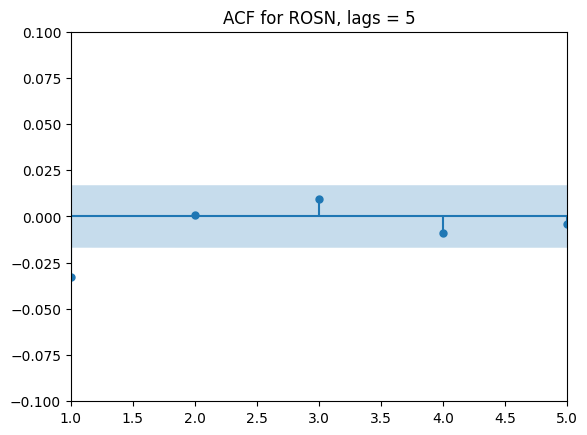

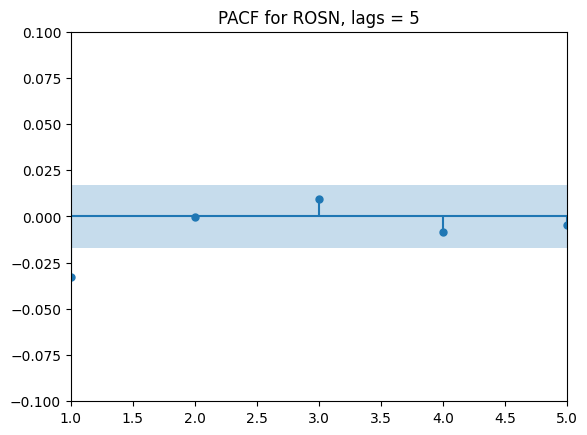


Instrument: GOLD
Shapiro-Wilk Test: Statistics=0.4184203049936466, p-value=2.2751437177140332e-109
Kolmogorov-Smirnov Test: Statistics=0.49487646317873824, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13447.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-119.59136952727548, p-value=0.0


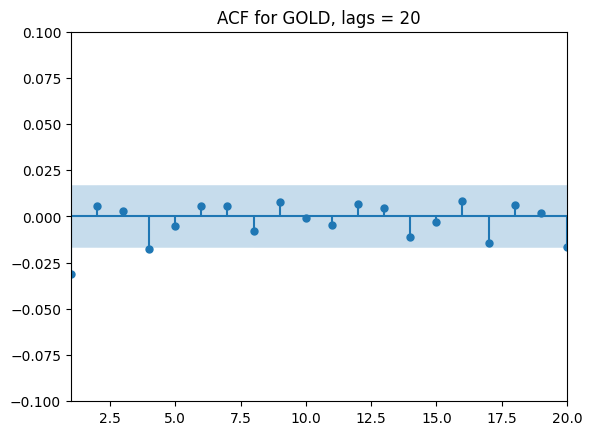

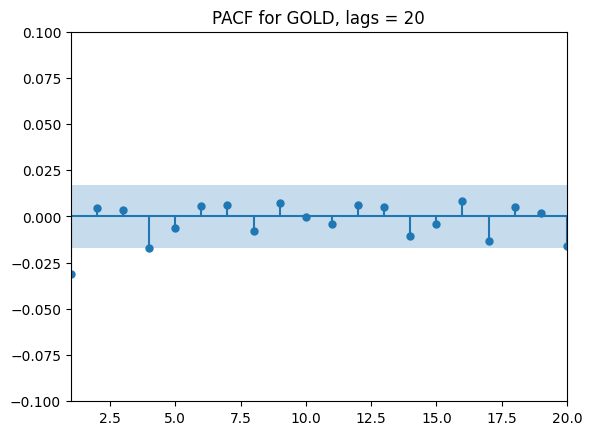

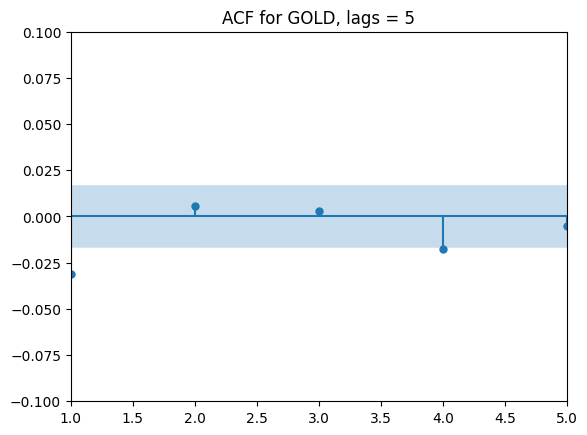

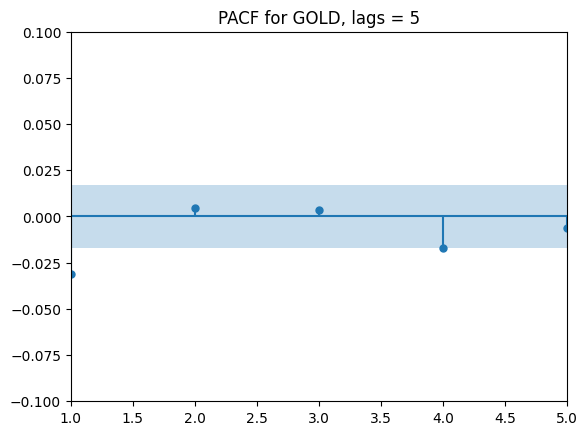


Instrument: LKOH
Shapiro-Wilk Test: Statistics=0.5074444410306407, p-value=4.375449194050623e-105
Kolmogorov-Smirnov Test: Statistics=0.49480599177499235, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13447.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-60.5517230527444, p-value=0.0


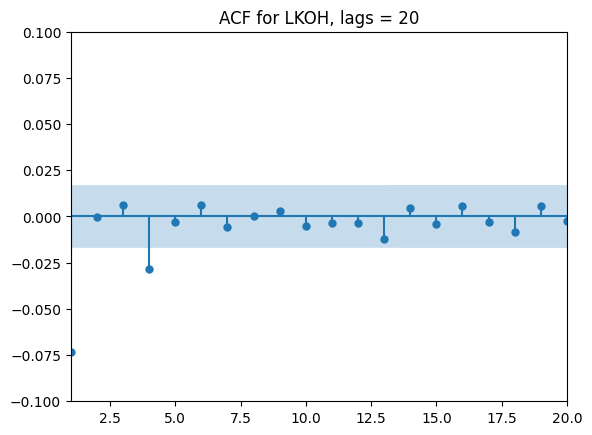

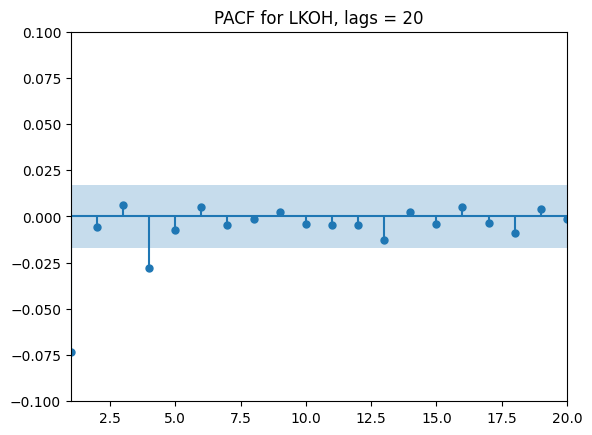

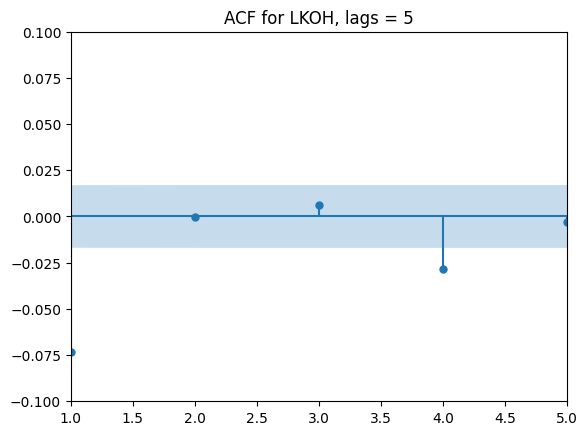

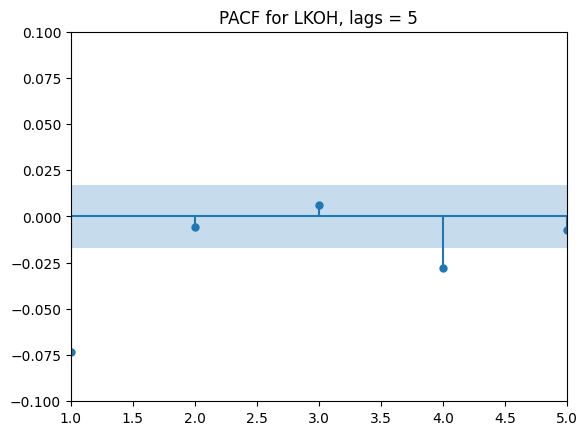

In [ ]:
# Проверка гипотез
for key, df in data.items():
    print(f'\nInstrument: {key}')

    # Логарифмические доходности
    df['log_return'] = np.log(df['close'] / df['close'].shift(1)).dropna()

    # Проверка нормальности распределения логарифмических доходностей
    stat, p_value = shapiro(df['log_return'].dropna())
    print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')

    stat, p_value = kstest(df['log_return'].dropna(), 'norm')
    print(f'Kolmogorov-Smirnov Test: Statistics={stat}, p-value={p_value}')

    # Проверка стационарности временных рядов
    result = adfuller(df['log_return'].dropna())
    print(f'ADF Test: Statistics={result[0]}, p-value={result[1]}')

    # ACF и PACF
    plot_acf(df['log_return'].dropna(), lags=20)
    plt.title(f'ACF for {key}, lags = 20')
    plt.xlim(1, 20)
    plt.ylim(-0.1, 0.1)
    plt.show()

    plot_pacf(df['log_return'].dropna(), lags=20)
    plt.title(f'PACF for {key}, lags = 20')
    plt.xlim(1, 20)
    plt.ylim(-0.1, 0.1)
    plt.show()

    plot_acf(df['log_return'].dropna(), lags=5)
    plt.title(f'ACF for {key}, lags = 5')
    plt.xlim(1, 5)
    plt.ylim(-0.1, 0.1)
    plt.show()

    plot_pacf(df['log_return'].dropna(), lags=5)
    plt.title(f'PACF for {key}, lags = 5')
    plt.xlim(1, 5)
    plt.ylim(-0.1, 0.1)
    plt.show()

In [ ]:
# Разделение данных на трейн и тест
train, test = train_test_split(df, test_size=0.2, shuffle=False)
print(f'Train size: {len(train)}, Test size: {len(test)}')

Train size: 4034, Test size: 1009
